DataSet: ****ATIS Airline Travel Information System****

<font color="blue" size="8">****ATIS航空旅行信息系统****</font>


[https://www.kaggle.com/datasets/hassanamin/atis-airlinetravelinformationsystem](https://www.kaggle.com/datasets/hassanamin/atis-airlinetravelinformationsystem)

In [2]:
import pandas as pd
import numpy as np
np.random.seed(0)

In [3]:
data = pd.read_csv("/content/atis_intents.csv",header=None)
data.head()

,0,1
0,atis_flight,i want to fly from boston at 838 am and arriv...
1,atis_flight,what flights are available from pittsburgh to...
2,atis_flight_time,what is the arrival time in san francisco for...
3,atis_airfare,cheapest airfare from tacoma to orlando
4,atis_airfare,round trip fares from pittsburgh to philadelp...


<font color="Darkgreen" size="5">下面是对航空旅行信息数据进行分类预处理构建微调训练集</font>

<font color="purple" size="3">用户查询的文本的目标可以标记为：</font>

<font color="purple" size="3">  航班  ｜  机票  ｜  地面服务  ｜  缩写  ｜  飞行时间 </font>



In [4]:
data.columns = ['intent','text']

In [5]:
data['intent'].unique()

array(['atis_flight', 'atis_flight_time', 'atis_airfare', 'atis_aircraft',
       'atis_ground_service', 'atis_airport', 'atis_airline',
       'atis_distance', 'atis_abbreviation', 'atis_ground_fare',
       'atis_quantity', 'atis_city', 'atis_flight_no', 'atis_capacity',
       'atis_flight#atis_airfare', 'atis_meal', 'atis_restriction',
       'atis_airline#atis_flight_no',
       'atis_ground_service#atis_ground_fare',
       'atis_airfare#atis_flight_time', 'atis_cheapest',
       'atis_aircraft#atis_flight#atis_flight_no'], dtype=object)

In [6]:
data['intent'].nunique()

22

In [7]:
data['intent'] = data['intent'].str.replace('#','_')
data['intent'].unique()

array(['atis_flight', 'atis_flight_time', 'atis_airfare', 'atis_aircraft',
       'atis_ground_service', 'atis_airport', 'atis_airline',
       'atis_distance', 'atis_abbreviation', 'atis_ground_fare',
       'atis_quantity', 'atis_city', 'atis_flight_no', 'atis_capacity',
       'atis_flight_atis_airfare', 'atis_meal', 'atis_restriction',
       'atis_airline_atis_flight_no',
       'atis_ground_service_atis_ground_fare',
       'atis_airfare_atis_flight_time', 'atis_cheapest',
       'atis_aircraft_atis_flight_atis_flight_no'], dtype=object)

In [8]:
data['intent'] = data['intent'].str.replace('atis_','')
data['intent'].unique()

array(['flight', 'flight_time', 'airfare', 'aircraft', 'ground_service',
       'airport', 'airline', 'distance', 'abbreviation', 'ground_fare',
       'quantity', 'city', 'flight_no', 'capacity', 'flight_airfare',
       'meal', 'restriction', 'airline_flight_no',
       'ground_service_ground_fare', 'airfare_flight_time', 'cheapest',
       'aircraft_flight_flight_no'], dtype=object)

In [9]:
data['intent'].value_counts()

flight                        3666
airfare                        423
ground_service                 255
airline                        157
abbreviation                   147
aircraft                        81
flight_time                     54
quantity                        51
flight_airfare                  21
airport                         20
distance                        20
city                            19
ground_fare                     18
capacity                        16
flight_no                       12
meal                             6
restriction                      6
airline_flight_no                2
ground_service_ground_fare       1
airfare_flight_time              1
cheapest                         1
aircraft_flight_flight_no        1
Name: intent, dtype: int64

In [10]:
labels = ['flight','ground_service','airfare','abbreviation','flight_time']

In [11]:
data = data[data["intent"].isin(labels)]
data['intent'].value_counts()

flight            3666
airfare            423
ground_service     255
abbreviation       147
flight_time         54
Name: intent, dtype: int64

In [12]:
sample_data = data.groupby('intent').apply(lambda x: x.sample(n=40)).reset_index(drop = True)
sample_data.intent.value_counts()

abbreviation      40
airfare           40
flight            40
flight_time       40
ground_service    40
Name: intent, dtype: int64

In [13]:
sample_data.to_csv("sample_data.csv",index=False)

In [14]:
sample_data = sample_data[['text','intent']]

In [15]:

sample_data.head()

,text,intent
0,what does mco stand for,abbreviation
1,what does the abbreviation co mean,abbreviation
2,what is hp,abbreviation
3,is fare code b the same as business class,abbreviation
4,what does ewr mean,abbreviation


In [16]:
sample_data['text'] = sample_data['text'].str.strip()
sample_data['intent'] = sample_data['intent'].str.strip()

In [17]:
sample_data['text'] = sample_data['text'] + "\n\nIntent:\n\n"
# sample_data['text'] = "Classify text into on the intent: flight, ground_service, airline, aircraft, flight_time. Text: "+sample_data['text'] + "\n\nIntent:\n\n"
sample_data['intent'] = " "+sample_data['intent'] + " END"
sample_data.head()

,text,intent
0,what does mco stand for\n\nIntent:\n\n,abbreviation END
1,what does the abbreviation co mean\n\nIntent:\n\n,abbreviation END
2,what is hp\n\nIntent:\n\n,abbreviation END
3,is fare code b the same as business class\n\nI...,abbreviation END
4,what does ewr mean\n\nIntent:\n\n,abbreviation END


<font color="DarkOrange" size="4.5">微调训练集的数据样例为：当用户询问“票价代码 y 是什么意思？ 我们判定用户查询的意图是：缩写”</font>

In [18]:
print(sample_data['text'][0])

what does mco stand for

Intent:




In [19]:
print(sample_data['intent'][0])

 abbreviation END


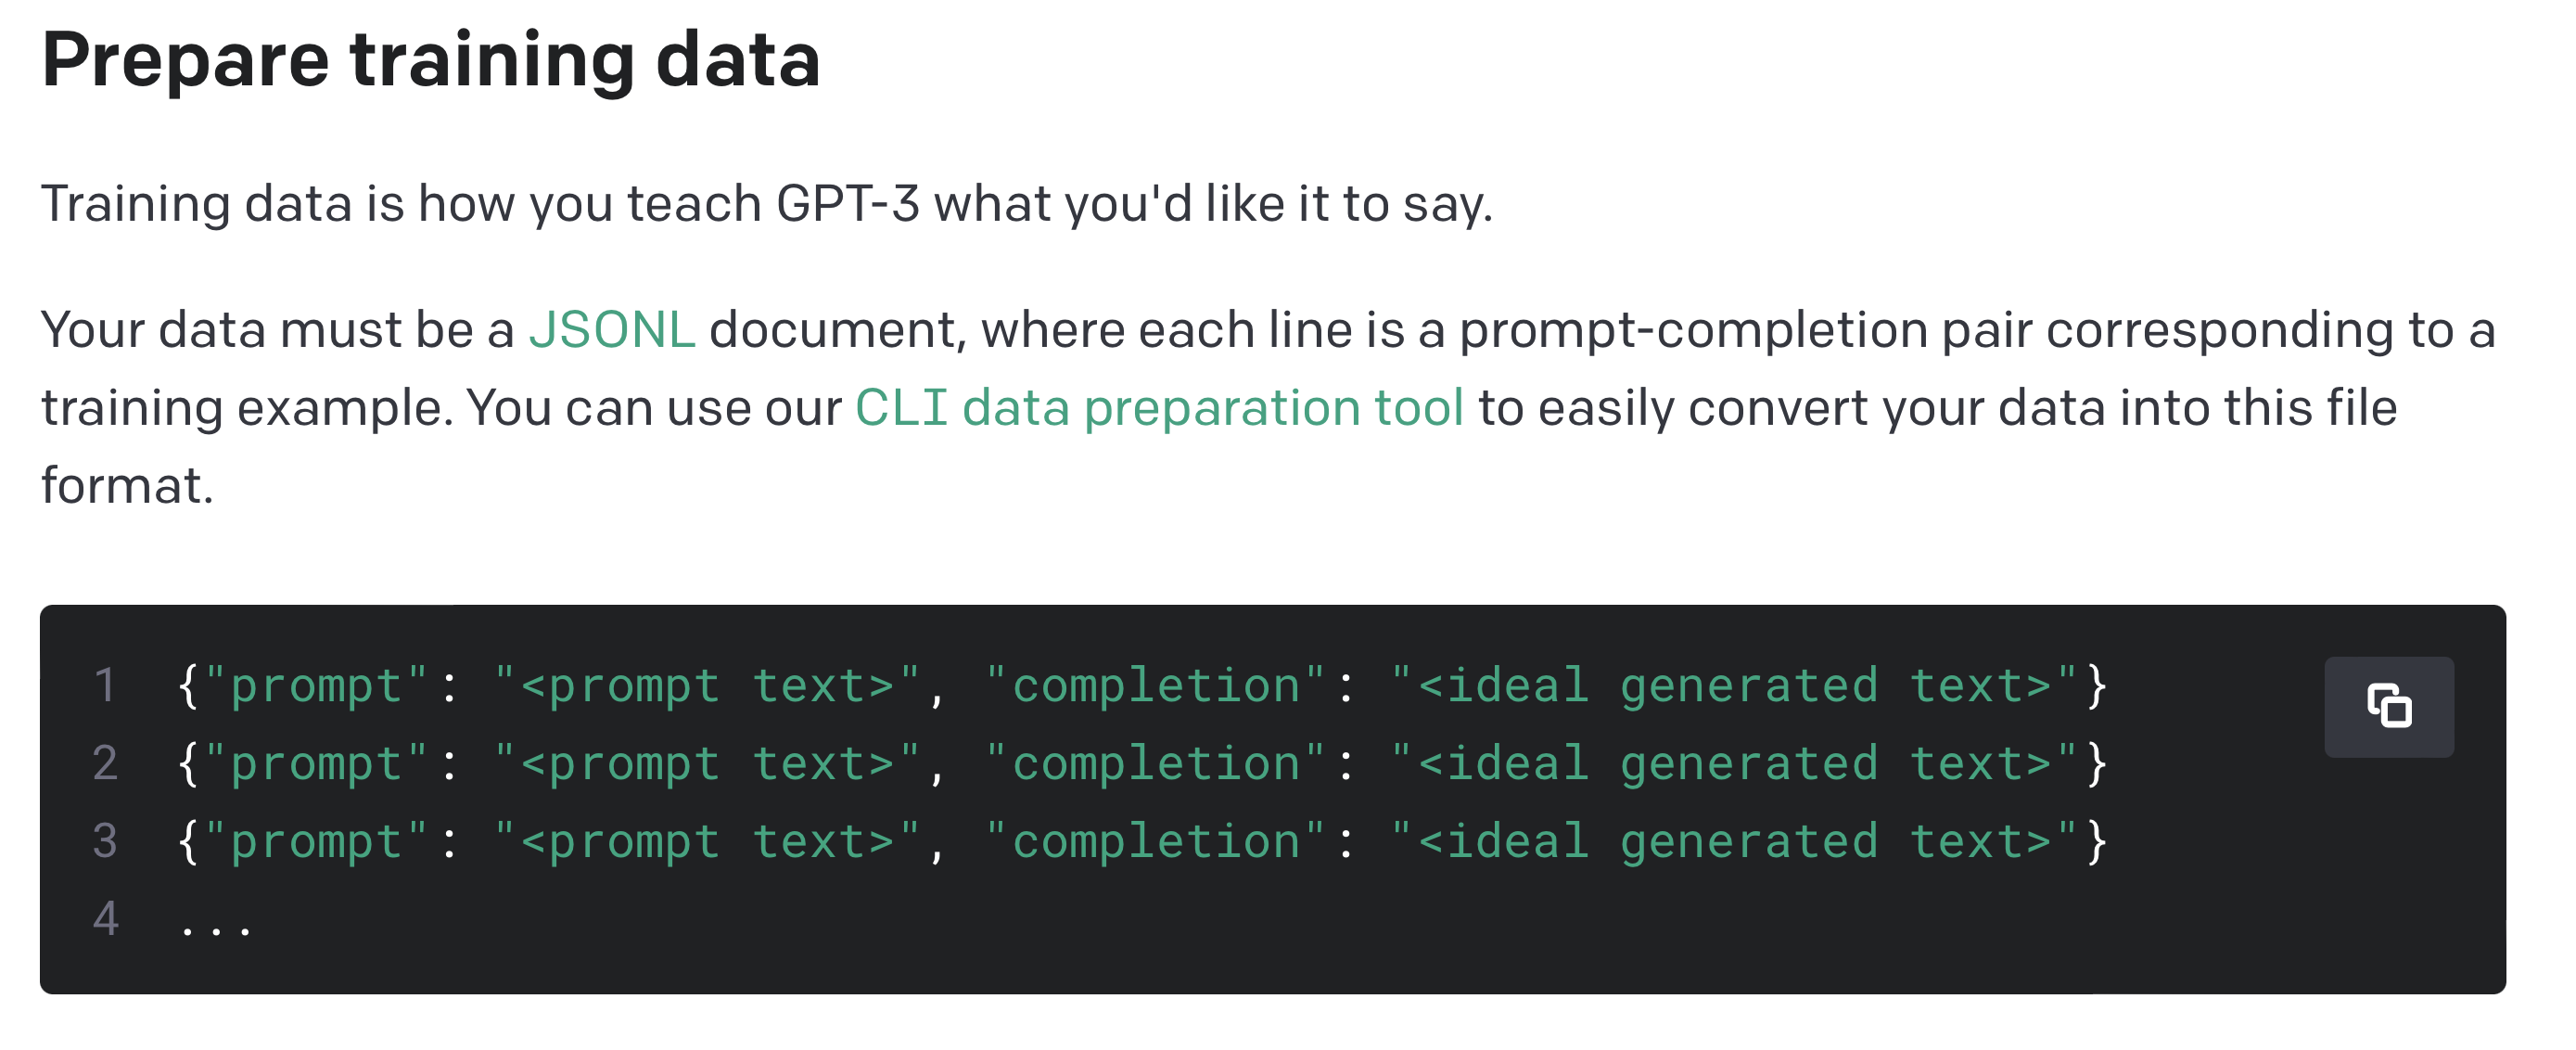

In [20]:
sample_data.columns = ['prompt','completion']

<font color="Darkblue" size="5.5">OpenAI对微调训练集的数据格式是有要求的，如上面图例，必须是JSONL格式，在上面的预处理代码中，我已经把微调训练集转化为上述的格式，我在下面打印出数据给大家参考。</font>

In [23]:
sample_data.to_json("intent_sample.jsonl", orient='records', lines=True)
#print(sample_data.head())
json_data = sample_data.head(5).to_json(orient='records', lines=True, indent=2)
print(json_data)

                                              prompt         completion
0             what does mco stand for\n\nIntent:\n\n   abbreviation END
1  what does the abbreviation co mean\n\nIntent:\n\n   abbreviation END
2                          what is hp\n\nIntent:\n\n   abbreviation END
3  is fare code b the same as business class\n\nI...   abbreviation END
4                  what does ewr mean\n\nIntent:\n\n   abbreviation END

  {
    "prompt":"what does mco stand for\n\nIntent:\n\n",
    "completion":" abbreviation END"
  }

  {
    "prompt":"what does the abbreviation co mean\n\nIntent:\n\n",
    "completion":" abbreviation END"
  }

  {
    "prompt":"what is hp\n\nIntent:\n\n",
    "completion":" abbreviation END"
  }

  {
    "prompt":"is fare code b the same as business class\n\nIntent:\n\n",
    "completion":" abbreviation END"
  }

  {
    "prompt":"what does ewr mean\n\nIntent:\n\n",
    "completion":" abbreviation END"
  }




In [ ]:
# sample_data.to_json("intent_.json", orient='records')

In [ ]:
!pip install --upgrade openai

<font color="Darkred" size="5.5">在CoLab的Python环境中安装OpenAI的库文件</font>

In [ ]:
!openai tools fine_tunes.prepare_data -f intent_sample.jsonl

Analyzing...

- Your file contains 200 prompt-completion pairs
- Based on your data it seems like you're trying to fine-tune a model for classification
- For classification, we recommend you try one of the faster and cheaper models, such as `ada`
- For classification, you can estimate the expected model performance by keeping a held out dataset, which is not used for training
- There are 10 duplicated prompt-completion sets. These are rows: [11, 15, 19, 24, 27, 34, 39, 129, 152, 179]
- All prompts end with suffix `\n\nIntent:\n\n`. This suffix seems very long. Consider replacing with a shorter suffix, such as `\n\n###\n\n`

Based on the analysis we will perform the following actions:
- [Recommended] Remove 10 duplicate rows [Y/n]: Y
- [Recommended] Would you like to split into training and validation set? [Y/n]: Y


Your data will be written to a new JSONL file. Proceed [Y/n]: Y

Wrote modified files to `intent_sample_prepared_train.jsonl` and `intent_sample_prepared_valid.jsonl`
Feel 

In [ ]:
import os
os.environ['OPENAI_API_KEY'] = "key"

In [ ]:
!openai api fine_tunes.create -t "intent_sample_prepared_train.jsonl" -v "intent_sample_prepared_valid.jsonl" -m 'davinci'

Found potentially duplicated files with name 'intent_sample_prepared_train.jsonl', purpose 'fine-tune' and size 17810 bytes
file-ujyQ2W8fzEBP5nKviYzjBE6d
Enter file ID to reuse an already uploaded file, or an empty string to upload this file anyway: 
Upload progress: 100% 17.8k/17.8k [00:00<00:00, 29.4Mit/s]
Uploaded file from intent_sample_prepared_train.jsonl: file-qFZO4gBx4D1AfG6nXLZRPYRO
Found potentially duplicated files with name 'intent_sample_prepared_valid.jsonl', purpose 'fine-tune' and size 4643 bytes
file-KMcFoGeWhZwDVKd2rij0fW2f
Enter file ID to reuse an already uploaded file, or an empty string to upload this file anyway: 
Upload progress: 100% 4.64k/4.64k [00:00<00:00, 6.03Mit/s]
Uploaded file from intent_sample_prepared_valid.jsonl: file-PoccQPUMQqex4ctcDqC95gF7
Created fine-tune: ft-L68gCxl9xH1Cf6JZ7HYGevDV
Streaming events until fine-tuning is complete...

(Ctrl-C will interrupt the stream, but not cancel the fine-tune)
[2022-09-11 18:52:30] Created fine-tune: ft-L68g

In [ ]:
!openai api fine_tunes.follow -i ft-L68gCxl9xH1Cf6JZ7HYGevDV

[2022-09-11 18:52:30] Created fine-tune: ft-L68gCxl9xH1Cf6JZ7HYGevDV
[2022-09-11 18:52:34] Fine-tune costs $0.40
[2022-09-11 18:52:35] Fine-tune enqueued. Queue number: 0
[2022-09-11 18:52:36] Fine-tune started
[2022-09-11 18:59:59] Completed epoch 1/4
[2022-09-11 19:00:46] Completed epoch 2/4
[2022-09-11 19:01:36] Completed epoch 3/4
[2022-09-11 19:02:23] Completed epoch 4/4
[2022-09-11 19:05:11] Uploaded model: davinci:ft-personal-2022-09-11-19-05-11
[2022-09-11 19:05:13] Uploaded result file: file-VWYf7Mgq4dL8lXEDP0u85f17
[2022-09-11 19:05:13] Fine-tune succeeded

Job complete! Status: succeeded 🎉
Try out your fine-tuned model:

openai api completions.create -m davinci:ft-personal-2022-09-11-19-05-11 -p <YOUR_PROMPT>


In [ ]:
# prompt = "Do we have london flight on Monday\n\nIntent:\n\n"
# prompt = "what is the ap57 restriction\n\nIntent:\n\n"
prompt = "show me ground transportation in baltimore\n\nIntent:\n\n"

In [ ]:
import openai
openai.api_key ='key'
response = openai.Completion.create(
  model="davinci:ft-personal-2022-09-11-19-05-11",
  prompt=prompt,
  max_tokens=5,
  temperature=0,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0,
  stop=[" END"]
)
print(response['choices'][0]['text'])

 ground_service
